# 3 March Clustering 

In [1]:
# ingredients 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly 
import plotly.graph_objs as go 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 

# get the data and EDA 

In [2]:
cd .. 

/Users/siandavies/Documents/working


In [49]:
arrests=pd.read_csv('USArrests.csv')

In [50]:
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


- scale the data 
- drop the object 

# reshaping the data 
- make the index the name of the state 

In [51]:
#copy state to index
arrests.index=arrests.iloc[:,0]

In [52]:
#drop state from columns 
arrests=arrests.iloc[:,1:5]

In [53]:
#rename index 
arrests.rename_axis(None,inplace=True)

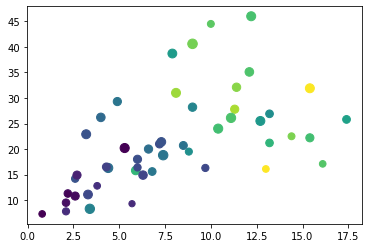

In [14]:
# one column on x, one on y, one on shape, one on colour = 4 
plt.scatter(arrests.iloc[:,0],arrests.iloc[:,3], arrests.iloc[:,2],arrests.iloc[:,1]);

# apply clustering - scale the data first 

In [15]:
scaler=StandardScaler()

In [16]:
scaler.fit(arrests)

StandardScaler()

In [17]:
scaler.mean_

array([  7.788, 170.76 ,  65.54 ,  21.232])

In [18]:
arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [19]:
arrests_scaled=scaler.transform(arrests)

In [23]:
type(arrests_scaled)

numpy.ndarray

In [24]:
arrests_scaled_df=pd.DataFrame(arrests_scaled,columns=['murder','assault','urbanpop','rape'])

In [25]:
arrests_scaled_df.describe()

,murder,assault,urbanpop,rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [26]:
arrests_scaled_df.head()

,murder,assault,urbanpop,rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


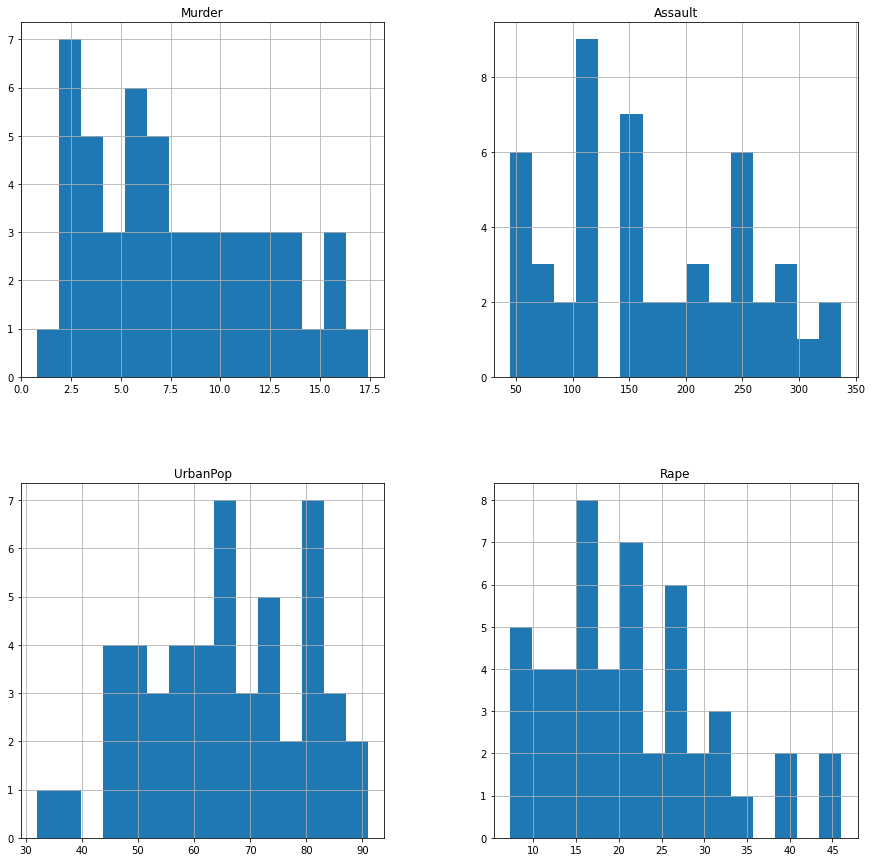

In [29]:
arrests.hist(bins=15,figsize=(15,15));
# visualise data to check the shape has not changed through scaling 

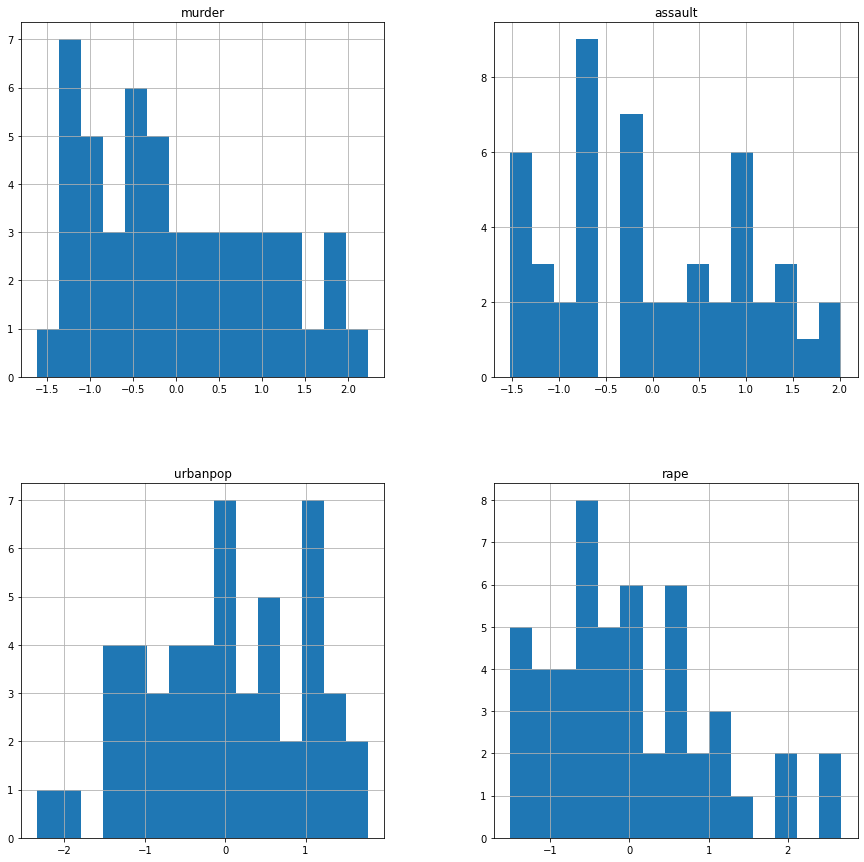

In [27]:
arrests_scaled_df.hist(bins=15,figsize=(15,15));

## Clustering 

In [30]:
K_Means=KMeans(n_clusters=5,random_state=5)# use consistent random state 

In [31]:
cluster_arrests_sc=K_Means.fit(arrests_scaled_df)

In [32]:
cluster_arrests_sc.cluster_centers_

array([[-0.23996529, -0.33082798, -0.0702524 , -0.1343076 ],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [-0.76257011, -0.53850456,  1.25337729, -0.53550482]])

In [33]:
cluster_arrests_sc.labels_

array([1, 2, 2, 0, 2, 2, 4, 0, 2, 1, 4, 3, 2, 0, 3, 0, 0, 1, 3, 2, 4, 2,
       3, 1, 0, 0, 0, 2, 3, 4, 2, 2, 1, 3, 0, 0, 0, 0, 4, 1, 3, 1, 2, 4,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [35]:
#add cluster back into df 
arrests_scaled_df['cluster_no']=cluster_arrests_sc.labels_

In [36]:
arrests_scaled_df['cluster_no'].value_counts()

0    15
2    12
3    10
1     7
4     6
Name: cluster_no, dtype: int64

# Apply clustering - with non scaled data 

In [ ]:
#use same configuration of kmeans, fit on non scaled data frame 

In [37]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [38]:
cluster_nonscaled=K_Means.fit(arrests)

In [39]:
arrests_copy=arrests

In [54]:
arrests_copy['cluster']=cluster_nonscaled.labels_

In [55]:
arrests_copy['cluster'].value_counts()

2    14
1    12
0    10
3    10
4     4
Name: cluster, dtype: int64

In [56]:
arrests_scaled_df['cluster_no'].value_counts()

0    15
2    12
3    10
1     7
4     6
Name: cluster_no, dtype: int64

## Visualise the cluster

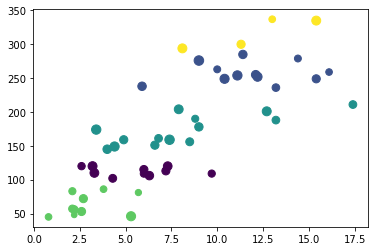

In [59]:
plt.scatter(arrests_copy.iloc[:,0],arrests_copy.iloc[:,1], arrests_copy.iloc[:,2],arrests_copy.iloc[:,4]);

In [60]:
arrests_copy.head(1)

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1


In [62]:
# size 
markersize=arrests_copy['UrbanPop']
# colour = cluster 
markercolour=arrests_copy['cluster']
# fig 
fig1=go.Scatter3d(x=arrests_copy['Murder'],y=arrests_copy['Rape'],z=arrests_copy['Assault'],
                 marker=dict(size=markersize,
                            color=markercolour,
                            opacity=0.9,
                            colorscale='Blues'),
                 line=dict (width=0.2),
                 mode='markers')
# layout 
mylayout=go.Layout(scene=dict(xaxis=dict(title='Murder'),
                             yaxis=dict(title='Rape'),
                             zaxis=dict(title='Assault')))

In [63]:
# html offline plot 
plotly.offline.plot({"data":[fig1],
                    "layout":mylayout},
                    auto_open=True,
                    filename=("5dplot.html"))

'5dplot.html'

# picking the optimum K 

###  3 metrics : inertia, distortion, silouhette score 

In [71]:
# scaled data kmeans model 

In [81]:
# lets remove the cluster from my df!
arrests_scaled_df=arrests_scaled_df.drop('cluster_no',axis=1)

In [82]:
K=range(5,18)
inertia=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(arrests_scaled_df)
    inertia.append(kmeans.inertia_)

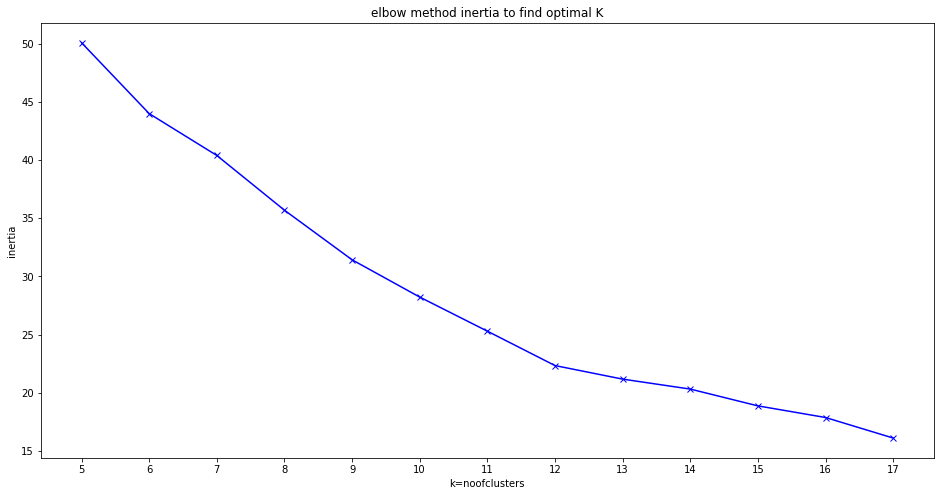

In [83]:
#plot the resulting inertia - elbow 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

In [86]:
K=range(5,18)
sil=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=5)
    kmeans.fit(arrests_scaled_df)
    sil.append(silhouette_score(arrests_scaled_df,kmeans.predict(arrests_scaled_df)))
#silhouette score 
# if 1 - the clusters are very separated from eachother and clearly distinguished
# if 0 - clusters are indifferent - the distance between them are not significant and you cannot distinguish
# if -1 clusters are incorrectly assigned 

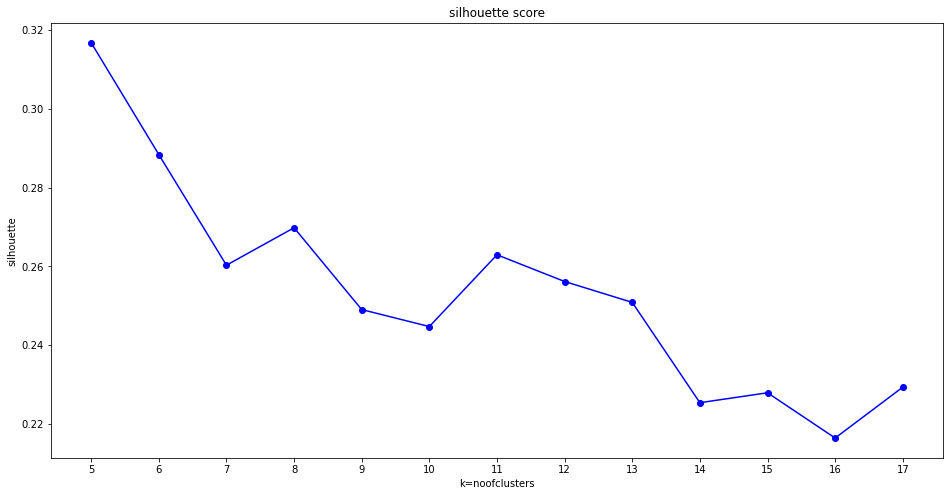

In [87]:
#plot the resulting silhouette 
plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette score');

# we go with k = 8 - lets redo the clustering 

In [88]:
kmeans=KMeans(n_clusters=8, random_state=5)

In [89]:
ClMo=kmeans.fit(arrests_scaled_df)

In [91]:
arrests_scaled_df['cluster_final']=ClMo.labels_

In [93]:
arrests_scaled_df['cluster_final'].value_counts()

1    11
2    10
4     9
5     9
0     4
3     3
7     3
6     1
Name: cluster_final, dtype: int64

In [94]:
arrests_scaled_df.head(1)

,murder,assault,urbanpop,rape,cluster_final
0,1.255179,0.790787,-0.526195,-0.003451,0


In [100]:
arrests.head(1)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2


# introduce new data 

In [101]:
new_d={'Murder':[18],'Assault':[320],'UrbanPop':[60],'Rape':[29]}

In [102]:
new_row=pd.DataFrame(data=new_d)

In [103]:
new_row

,Murder,Assault,UrbanPop,Rape
0,18,320,60,29


In [104]:
new_row_scaled=scaler.transform(new_row)

In [105]:
new_row_scaled

array([[ 2.36842031,  1.80896805, -0.38662083,  0.83776883]])

In [108]:
new_row_scaled_df=pd.DataFrame(new_row_scaled, columns=['murder','assault','urbanpop','rape'])

In [110]:
ClMo.predict(new_row_scaled_df)

array([0], dtype=int32)

###  we have the cluster no of the new row - pick a state with that cluster no 

In [111]:
c_new=0

In [125]:
arrests_scaled_df[arrests_scaled_df.cluster_final==c_new].sample(1)

,murder,assault,urbanpop,rape,cluster_final
9,2.229265,0.487757,-0.386621,0.492653,0


In [123]:
arrests[8:9]

,Murder,Assault,UrbanPop,Rape
Florida,15.4,335,80,31.9


In [119]:
new_row

,Murder,Assault,UrbanPop,Rape
0,18,320,60,29
